In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 국민대학교 데이터 EDA
- resume (8,482)
- recruitment (6,695)
- company (2,377)
- apply_train(57,946)
- sample_submission (42,410) : 사용자별로 5개씩 공고ID추천리스트 생성
- resume_education (8,482)
- resume_language (869)
- resume_certificate (12,975)

# resume (8,482)
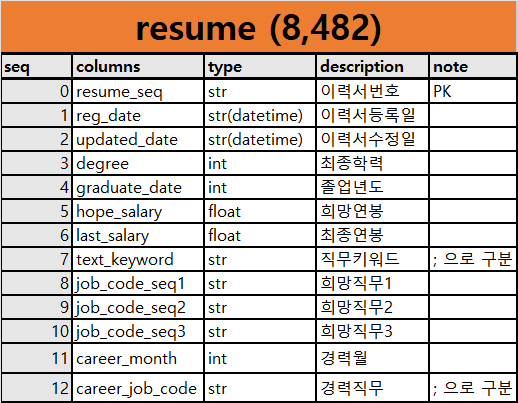

In [ ]:
# 파일 읽기(이곳을 수정하셔요)
resume_data = pd.read_csv('/content/drive/MyDrive/국민대학교_데이터/resume.csv')

# 데이터의 처음 몇 행을 확인
resume_data.head()

,resume_seq,reg_date,updated_date,degree,graduate_date,hope_salary,last_salary,text_keyword,job_code_seq1,job_code_seq2,job_code_seq3,career_month,career_job_code
0,U00606,2020-03-04,2020-05-22,4,2008,3500.0,3500.0,스타일디자이너;우븐디자이너,재료·화학·섬유·의복,NaN,NaN,67,NaN
1,U00509,2019-08-25,2020-09-02,2,0,0.0,3700.0,상품기획;MD;기획;머천다이저;머천다이징,재료·화학·섬유·의복,NaN,NaN,84,섬유;봉제;가방;의류
2,U02012,2017-11-20,2020-01-26,5,1979,3500.0,3100.0,니트디자인,재료·화학·섬유·의복,NaN,NaN,121,학교;학원;직원훈련(교육서비스)
3,U04599,2020-05-13,2020-05-28,4,2012,0.0,2500.0,MD;기획MD,재료·화학·섬유·의복,NaN,NaN,24,섬유;봉제;가방;의류
4,U07573,2019-07-23,2020-03-08,4,2010,1900.0,0.0,디자이너;남성복;스포츠웨어;편집디자인;코디네이터;일러스트레이터;VMD;MD,재료·화학·섬유·의복,NaN,NaN,0,NaN


## > **resume_seq**


요약: resume_seq(이력서 번호) 컬럼은 모두 고유한 값으로 문자열 자료형 타입이다.






In [ ]:
# "resume_seq" 컬럼의 데이터 분석

# 데이터 타입(문자열)
data_type = resume_data['resume_seq'].dtype

# 중복값 여부(중복값 0개 : 고유함)
duplicated_values = resume_data['resume_seq'].duplicated().sum()

# 고유한 값의 개수(8482개)
unique_values_count = resume_data['resume_seq'].nunique()


data_type, duplicated_values, unique_values_count

(dtype('O'), 0, 8482)

## > **reg_date**

요약 : reg_date(이력서 등록일) 컬럼은 2000년 10월 부터 2020년 12월 까지의 데이터이다.

특이사항 : 2019년도 부터 2020년도 사이에 이력서 등록량이 매우 늘어났음

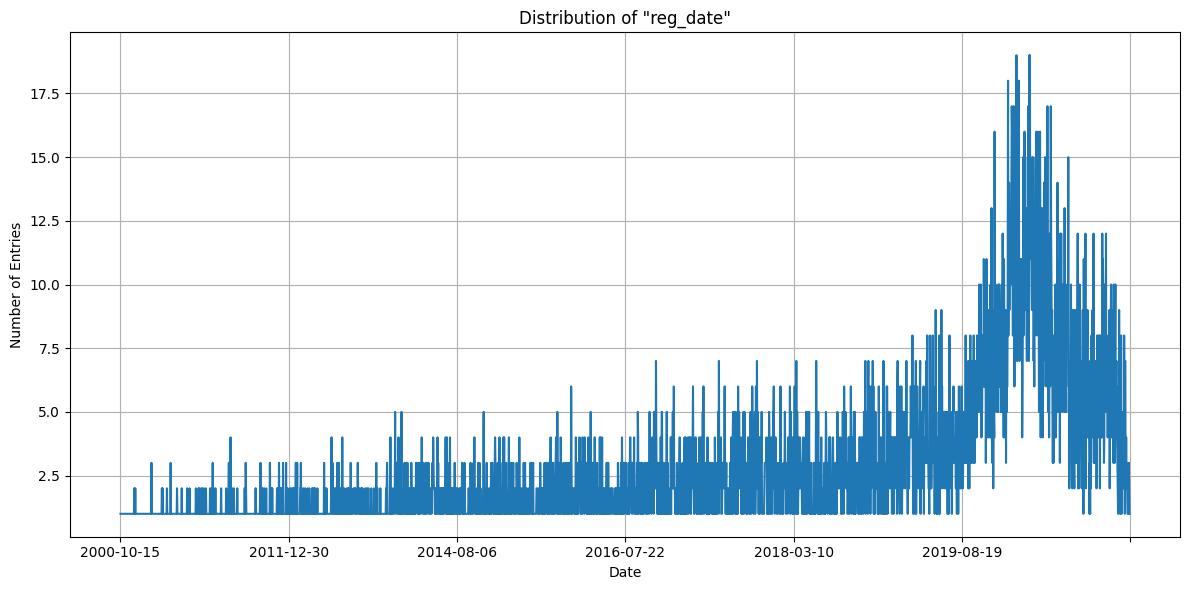

(dtype('O'), 0, '2000-10-15', '2020-12-31')

In [ ]:
# 1. 데이터 타입 확인
data_type = resume_data['reg_date'].dtype

# 2. 결측값 여부 확인
missing_values = resume_data['reg_date'].isnull().sum()

# 3. 최소 날짜 및 최대 날짜 확인
min_date = resume_data['reg_date'].min()
max_date = resume_data['reg_date'].max()

# 4. 날짜 데이터의 분포 시각화
plt.figure(figsize=(12, 6))
resume_data['reg_date'].value_counts().sort_index().plot()
plt.title('Distribution of "reg_date"')
plt.xlabel('Date')
plt.ylabel('Number of Entries')
plt.grid(True)
plt.tight_layout()
plt.show()

data_type, missing_values, min_date, max_date



## > **updated_date**

요약 : updated_date(이력서 수정일) 컬럼은 이력서가 마지막으로 수정된 날짜다

특이사항 : 모든 데이터가 2020년에 수정이 적어도 한번의 수정이 있었음

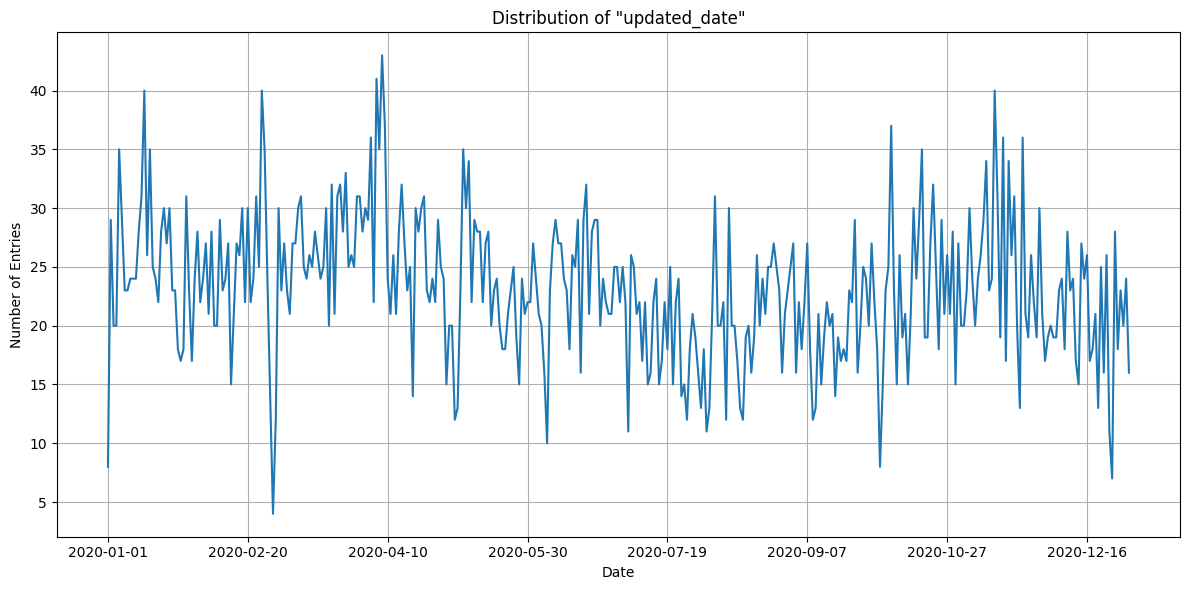

(dtype('O'), 0, '2020-01-01', '2020-12-31')

In [ ]:
# 1. 데이터 타입 확인
updated_data_type = resume_data['updated_date'].dtype

# 2. 결측값 여부 확인
updated_missing_values = resume_data['updated_date'].isnull().sum()

# 3. 최소 날짜 및 최대 날짜 확인
updated_min_date = resume_data['updated_date'].min()
updated_max_date = resume_data['updated_date'].max()

# 4. 날짜 데이터의 분포 시각화
plt.figure(figsize=(12, 6))
resume_data['updated_date'].value_counts().sort_index().plot()
plt.title('Distribution of "updated_date"')
plt.xlabel('Date')
plt.ylabel('Number of Entries')
plt.grid(True)
plt.tight_layout()
plt.show()

updated_data_type, updated_missing_values, updated_min_date, updated_max_date




## > **degree**



In [ ]:
# "degree" 컬럼 분석
degree_data_type = resume_data['degree'].dtype
degree_missing_values = resume_data['degree'].isnull().sum()
degree_value_counts = resume_data['degree'].value_counts()

degree_data_type, degree_missing_values, degree_value_counts

(dtype('int64'),
 0,
 4    7453
 3     463
 5     349
 2     211
 6       6
 Name: degree, dtype: int64)



## > **graduate_date**

2010년 쯤 피크를 찍는다


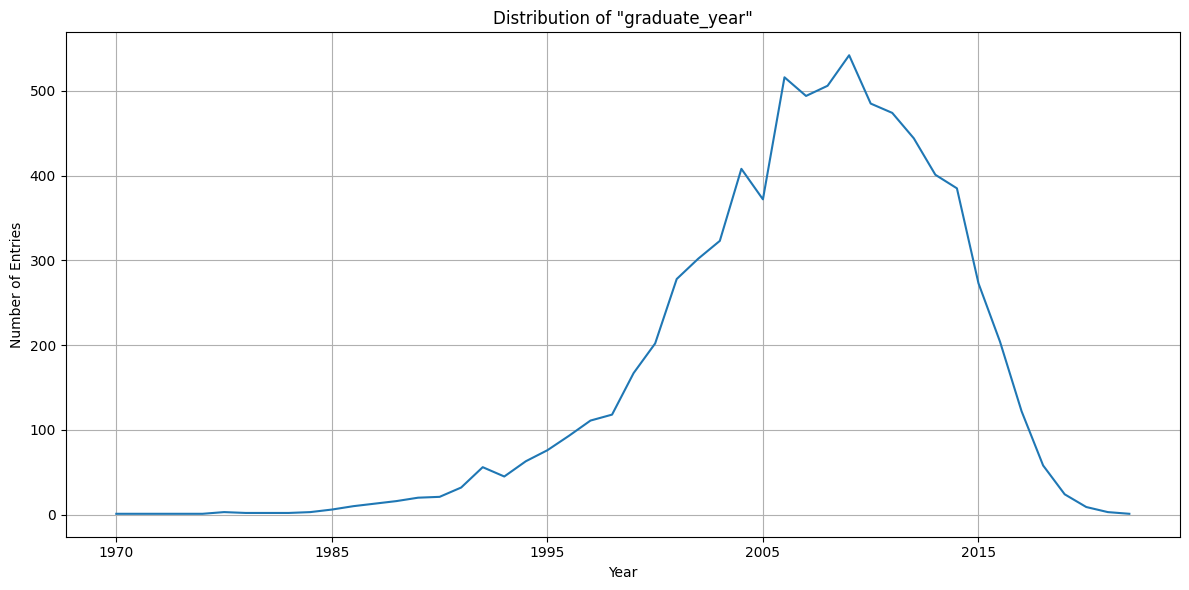

In [ ]:
# 정수 형식의 날짜 데이터에서 연도만 추출
resume_data['graduate_year'] = resume_data[resume_data['graduate_date'] > 0]['graduate_date'].astype(str).str[:4]

plt.figure(figsize=(12, 6))
# 각 연도별 졸업 인원 수 계산
graduate_year_counts_corrected = resume_data['graduate_year'].value_counts().sort_index().plot()

plt.title('Distribution of "graduate_year"')
plt.xlabel('Year')
plt.ylabel('Number of Entries')
plt.grid(True)
plt.tight_layout()
plt.show()



## > **hope_salary**


전제 조건 : 원하는 연봉이 0인 이력서가 5000개가 넘기 때문에 희망연봉이 0인경우를 제외하고 분석

요약 : 평균적으로 3300만원의 연봉을 희망함

특이사항 : 비정상적으로 높은 연봉을 희망하는 경우가 간혹있음 이를 분석에서 제외할지는 재량에 따라 판단하기

<0을 포함했을 때 그래프>
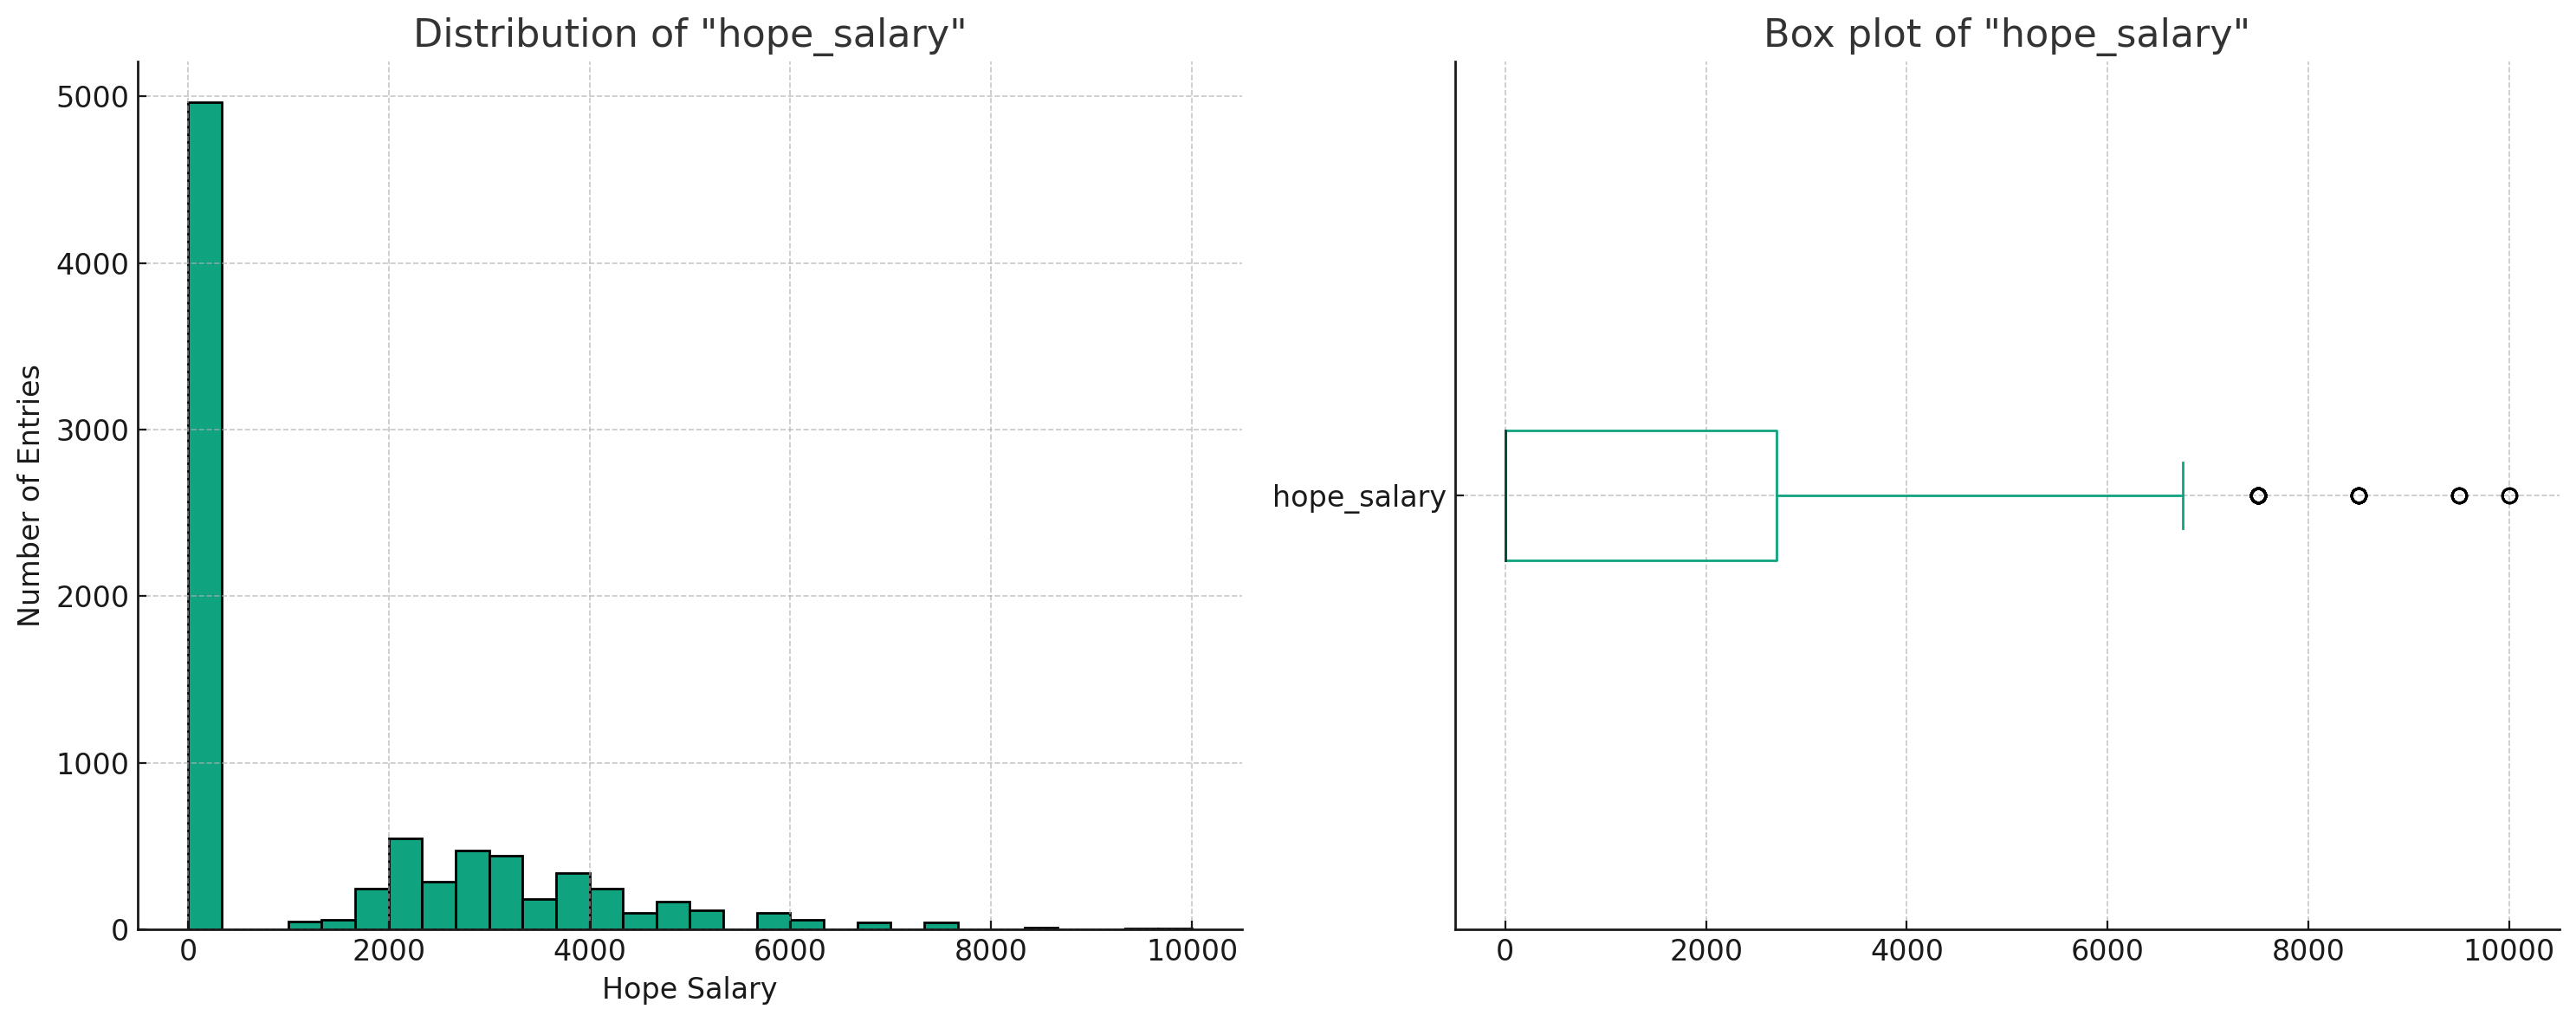



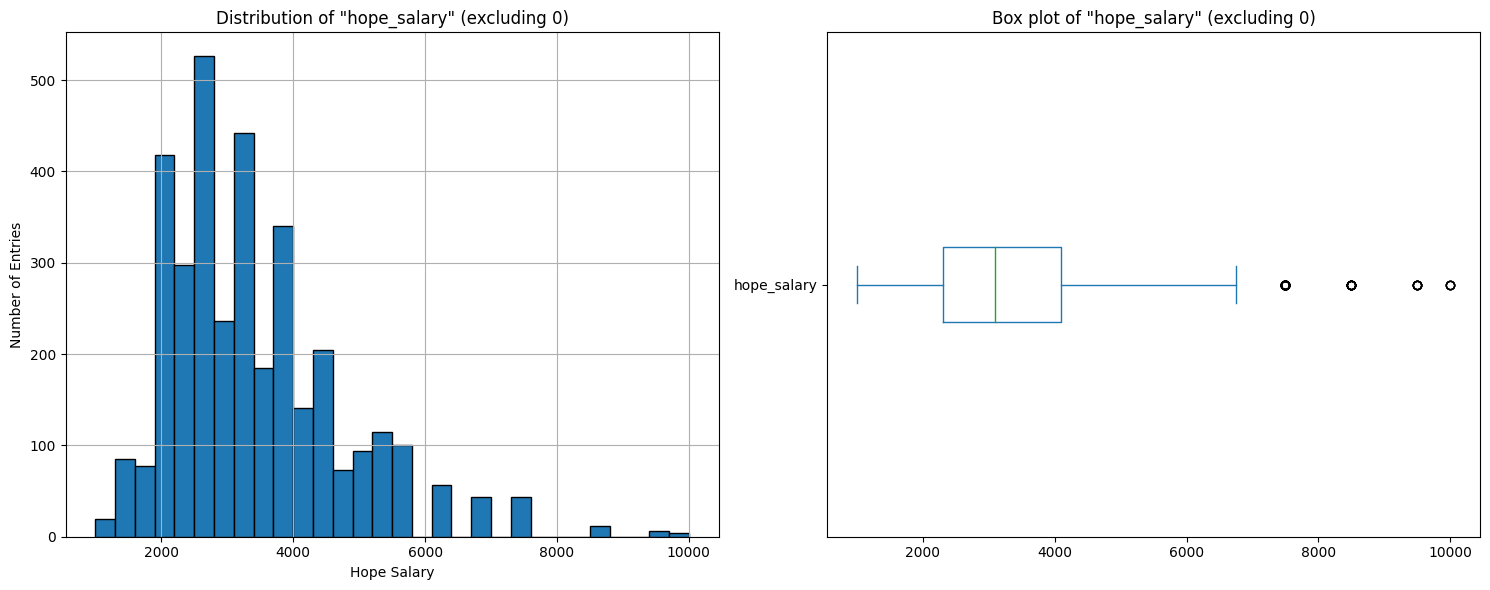

(dtype('float64'),
 0,
 count     3519.000000
 mean      3362.659847
 std       1332.493239
 min       1000.000000
 25%       2300.000000
 50%       3100.000000
 75%       4100.000000
 max      10000.000000
 Name: hope_salary, dtype: float64)

In [ ]:
# 0이 아닌 원하는 연봉 데이터만 선택
non_zero_hope_salary = resume_data[resume_data['hope_salary'] > 0]['hope_salary']

# 1. 데이터 타입 확인
data_type = non_zero_hope_salary.dtype

# 2. 결측값 여부 확인
missing_values = non_zero_hope_salary.isnull().sum()

# 3. 기술통계치
hope_salary_describe = non_zero_hope_salary.describe()

# 4. 연봉 데이터의 분포 시각화
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
non_zero_hope_salary.hist(bins=30, edgecolor='black')
plt.title('Distribution of "hope_salary" (excluding 0)')
plt.xlabel('Hope Salary')
plt.ylabel('Number of Entries')

plt.subplot(1, 2, 2)
non_zero_hope_salary.plot(kind='box', vert=False)
plt.title('Box plot of "hope_salary" (excluding 0)')

plt.tight_layout()
plt.show()

data_type, missing_values, hope_salary_describe



## > **last_salary**

전제 조건 : 이전 연봉이 0인 이력서가 2400개가 넘기 때문에 이전연봉이 0인경우를 제외하고 분석

요약 : 평균적으로 2500만원의 연봉을 받았었음

특이사항 : 비정상적으로 높은 연봉을 희망하는 경우가 간혹있음 이를 분석에서 제외할지는 재량에 따라 판단하기

<0을 포함했을 때 그래프>
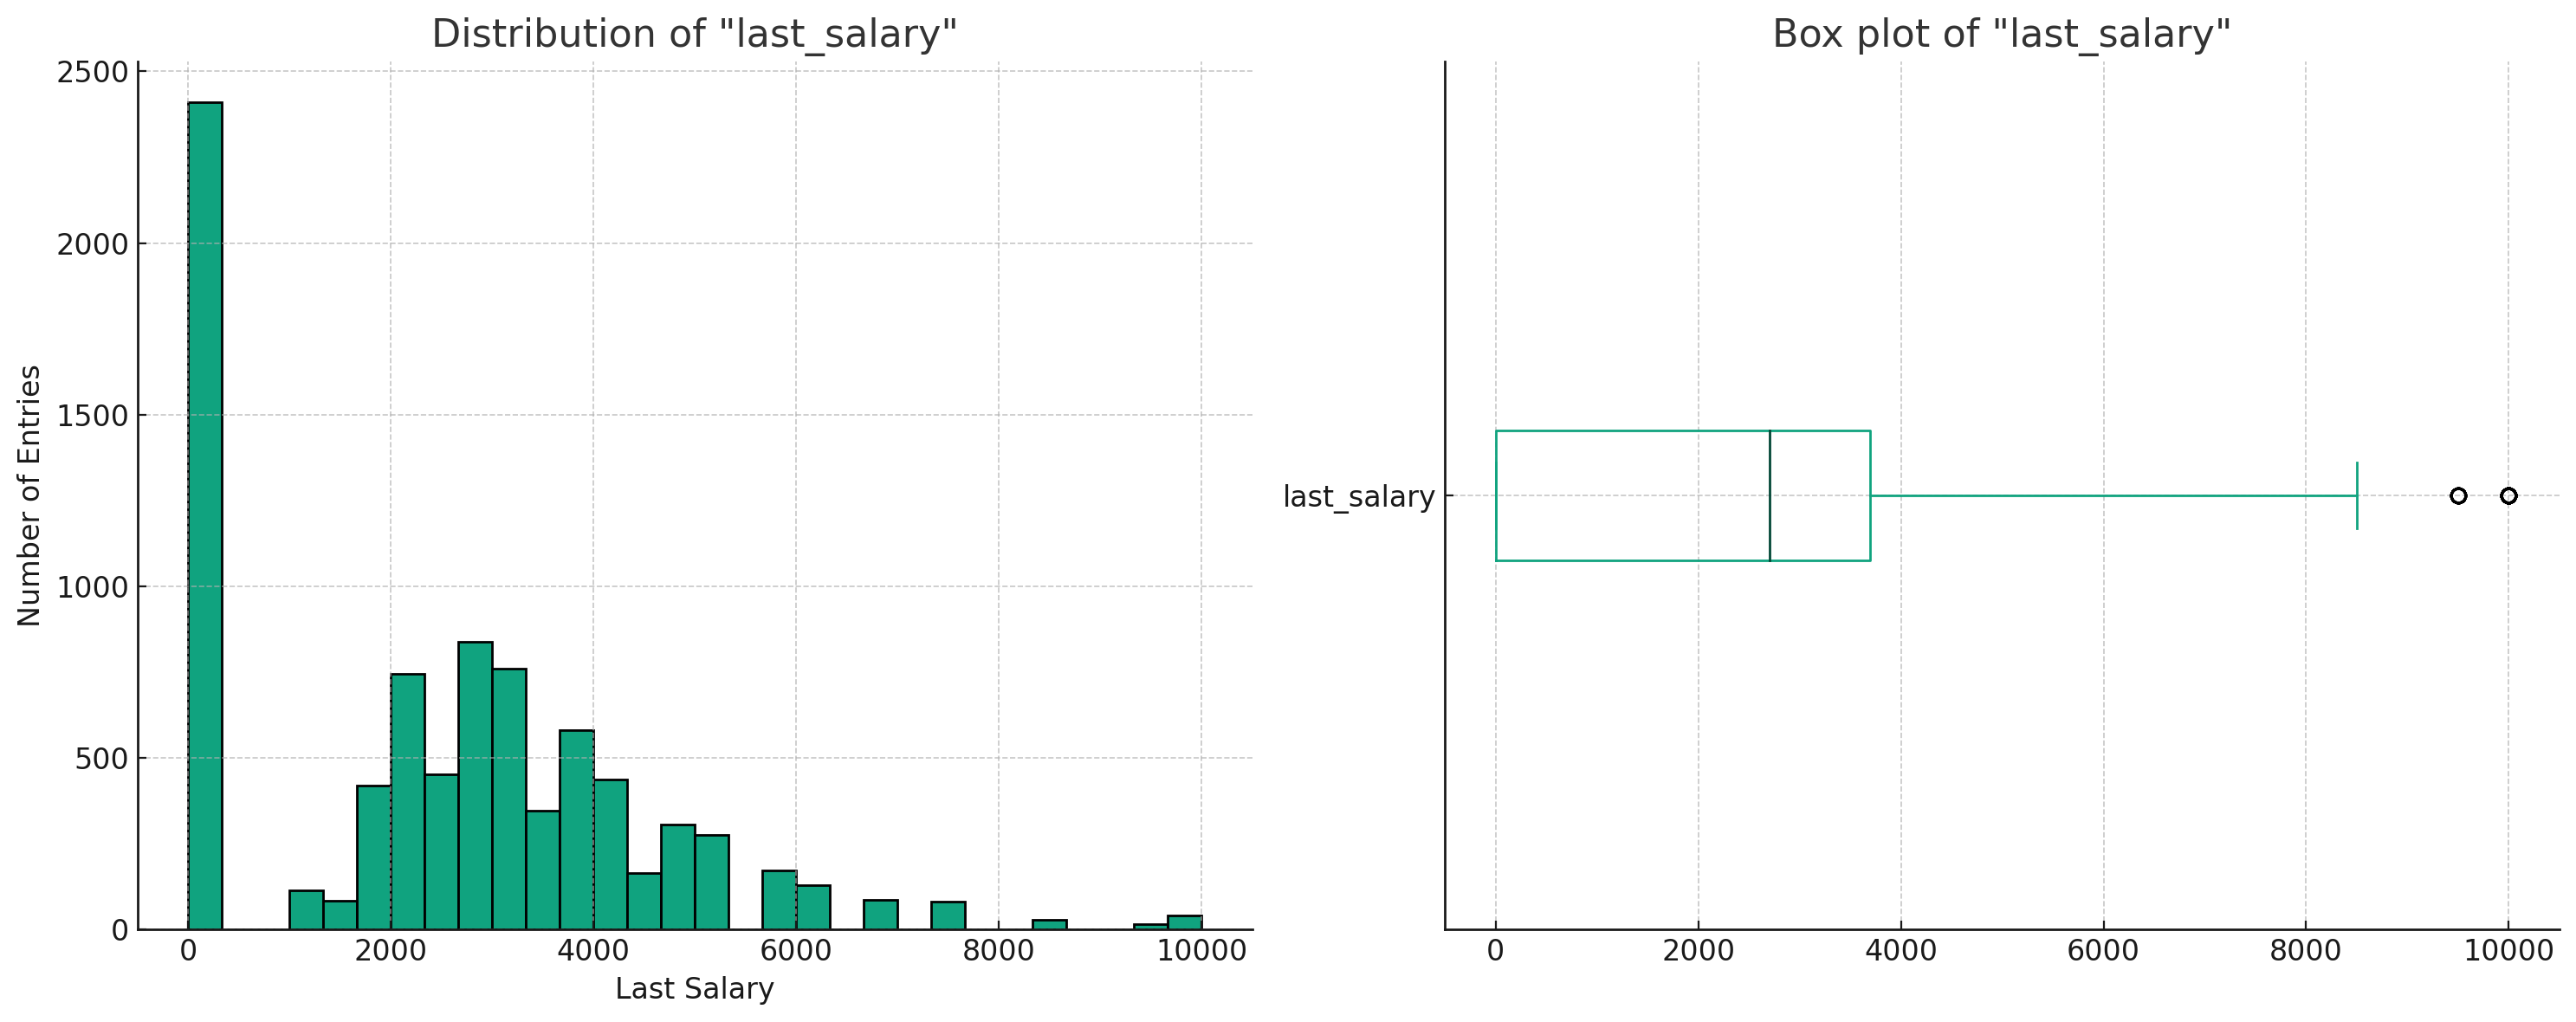


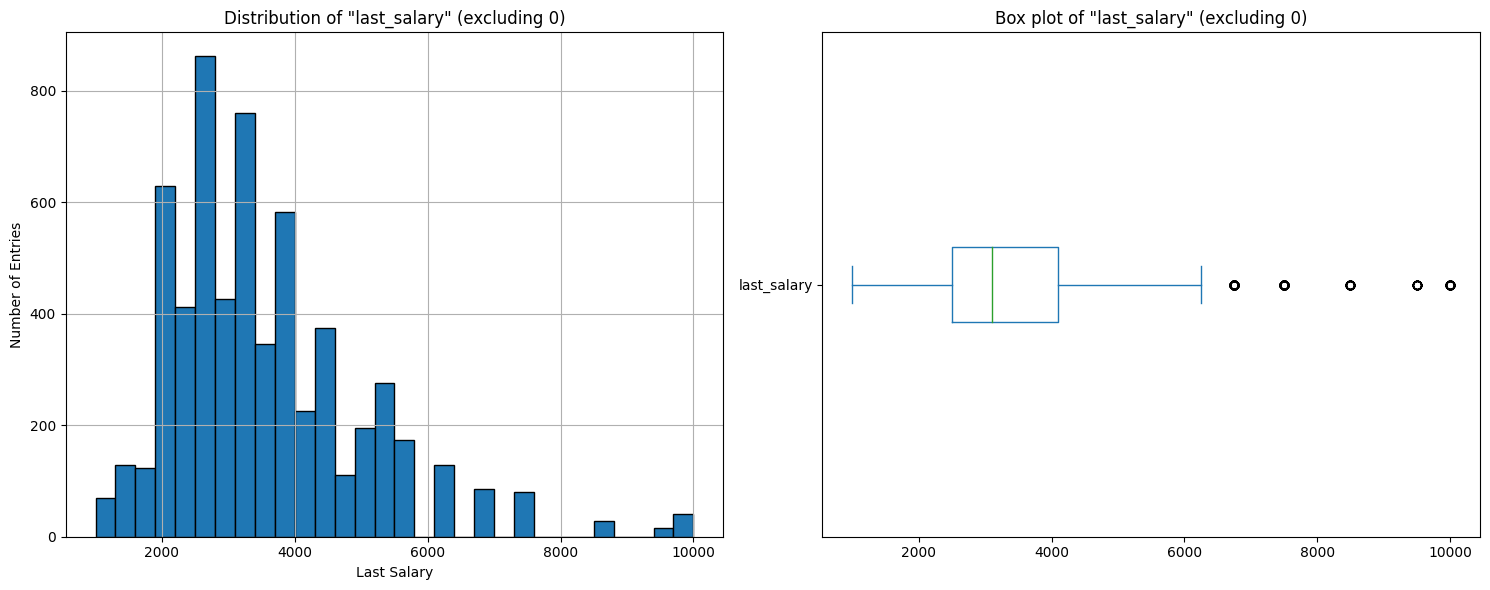

(dtype('float64'),
 0,
 count     6073.000000
 mean      3499.654207
 std       1471.184256
 min       1000.000000
 25%       2500.000000
 50%       3100.000000
 75%       4100.000000
 max      10000.000000
 Name: last_salary, dtype: float64)

In [ ]:
# 0이 아닌 이전 연봉 데이터만 선택
non_zero_last_salary = resume_data[resume_data['last_salary'] > 0]['last_salary']

# 1. 데이터 타입 확인
data_type = non_zero_last_salary.dtype

# 2. 결측값 여부 확인
missing_values = non_zero_last_salary.isnull().sum()

# 3. 기술통계치
last_salary_describe = non_zero_last_salary.describe()

# 4. 연봉 데이터의 분포 시각화
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
non_zero_last_salary.hist(bins=30, edgecolor='black')
plt.title('Distribution of "last_salary" (excluding 0)')
plt.xlabel('Last Salary')
plt.ylabel('Number of Entries')

plt.subplot(1, 2, 2)
non_zero_last_salary.plot(kind='box', vert=False)
plt.title('Box plot of "last_salary" (excluding 0)')

plt.tight_layout()
plt.show()

data_type, missing_values, last_salary_describe




## > **text_keyword**

요약 : 195개의 결측값이 있고 5300여개의 고유 키워드가 존재

특이사항 : 주관적으로 적는 키워드인것 같음 이를 카테고리화 해야할 필요성 존재



In [ ]:
# "text_keyword" 컬럼 분석
text_keyword_data_type = resume_data['text_keyword'].dtype
text_keyword_missing_values = resume_data['text_keyword'].isnull().sum()
text_keyword_unique_count = resume_data['text_keyword'].nunique()
text_keyword_top_keywords = resume_data['text_keyword'].value_counts().head(10)

text_keyword_data_type, text_keyword_missing_values, text_keyword_unique_count, text_keyword_top_keywords

(dtype('O'),
 195,
 5295,
 매장영업관리     273
 디자이너       254
 상품기획       191
 패션디자인      121
 패션디자이너     115
 MD          92
 영업MD        84
 VMD         83
 영업관리        78
 여성복디자이너     77
 Name: text_keyword, dtype: int64)

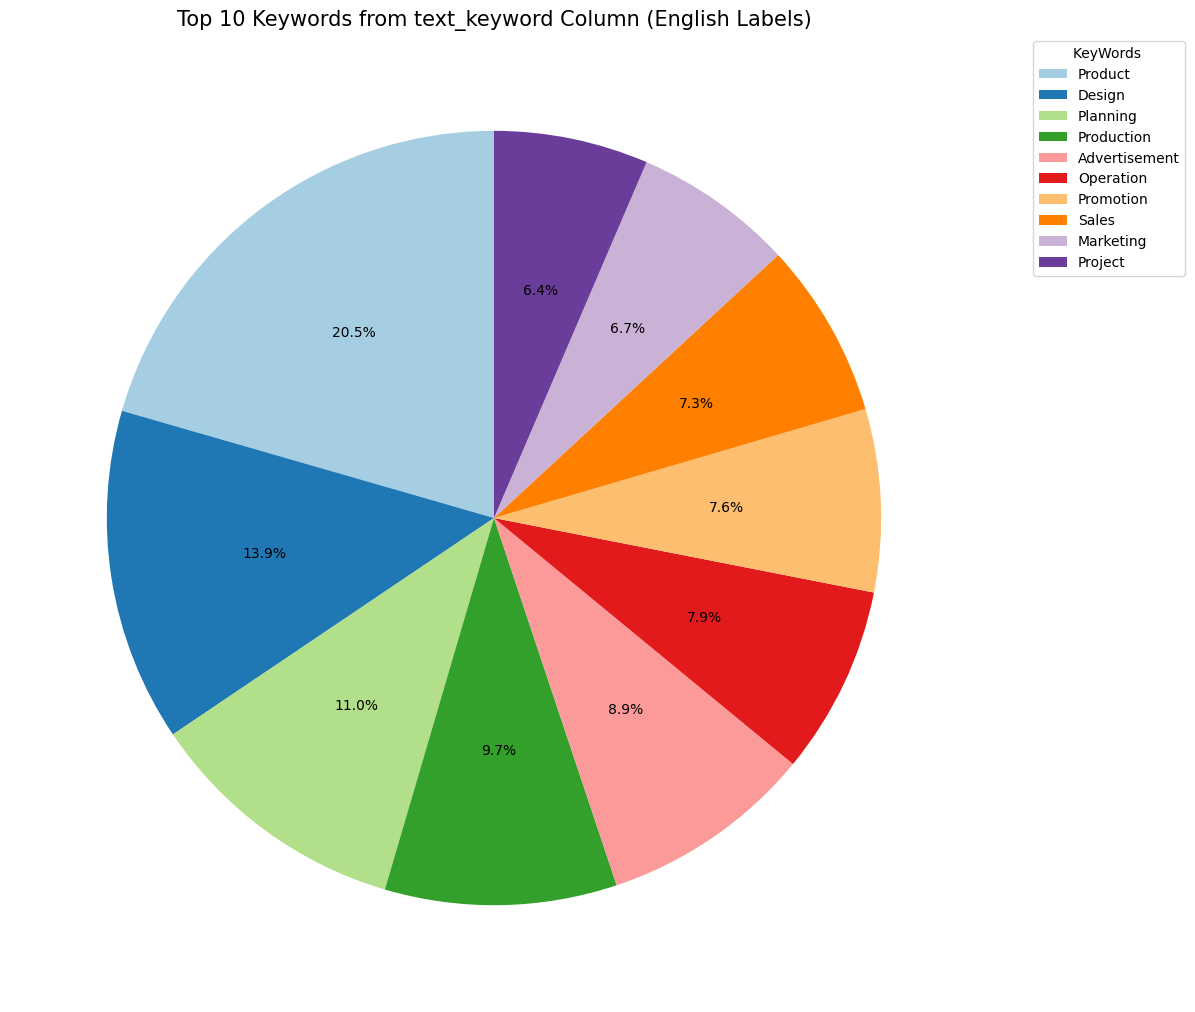

In [ ]:
# text_keyword 컬럼에서 세미콜론을 기준으로 키워드 분리
keywords = resume_data['text_keyword'].str.split(';', expand=True).stack()

# 각 키워드별 빈도수 계산
keyword_counts = keywords.value_counts()


# 상위 10개 키워드 선택
top_10_keywords = keyword_counts.head(10)

# 상위 10개 키워드 한글 라벨을 영어로 매핑
english_keyword_labels = {
    "상품": "Product",
    "디자인": "Design",
    "기획": "Planning",
    "제작": "Production",
    "광고": "Advertisement",
    "운영": "Operation",
    "프로모션": "Promotion",
    "영업": "Sales",
    "마케팅": "Marketing",
    "프로젝트": "Project"
}

# 한글 라벨을 영어로 변환
top_10_keywords_english = top_10_keywords.rename(index=english_keyword_labels)

# 파이 차트 그리기 (라벨 숨김)
fig, ax = plt.subplots(figsize=(12, 12))
ax.pie(top_10_keywords_english, labels=None, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)

# 제목 설정
ax.set_title('Top 10 Keywords from text_keyword Column (English Labels)', fontsize=15)
# 범례 설정
plt.legend(english_keyword_labels.values(), title='KeyWords ', bbox_to_anchor=(1.05, 1), loc='upper left')
# 그래프 출력
plt.tight_layout()
plt.show()



## > **job_code_seq1**



In [ ]:
# job_code_seq1 컬럼의 값별 빈도수 확인
job_code_seq1_counts = resume_data['job_code_seq1'].value_counts()
# 한글 job_code_seq1 라벨을 영어로 매핑
english_labels = {
    "재료·화학·섬유·의복": "Materials/Chemicals/Fiber/Clothing",
    "디자인": "Design",
    "경영·기획·회계·사무": "Management/Planning/Accounting/Admin",
    "영업·판매·TM": "Sales",
    "건설·기계·전기·전자": "Construction/Machinery/Electrical/Electronics",
    "전문·교육·자격": "Specialty/Education/Qualification",
    "기타 직종": "Other Jobs",
    "IT·게임": "IT/Game",
    "문화·예술·신문·방송": "Culture/Art/Newspaper/Broadcast"
}

# 한글 라벨을 영어로 변환
resume_data['job_code_seq1_english'] = resume_data['job_code_seq1'].map(english_labels)
job_code_seq1_english_counts = resume_data['job_code_seq1_english'].value_counts()

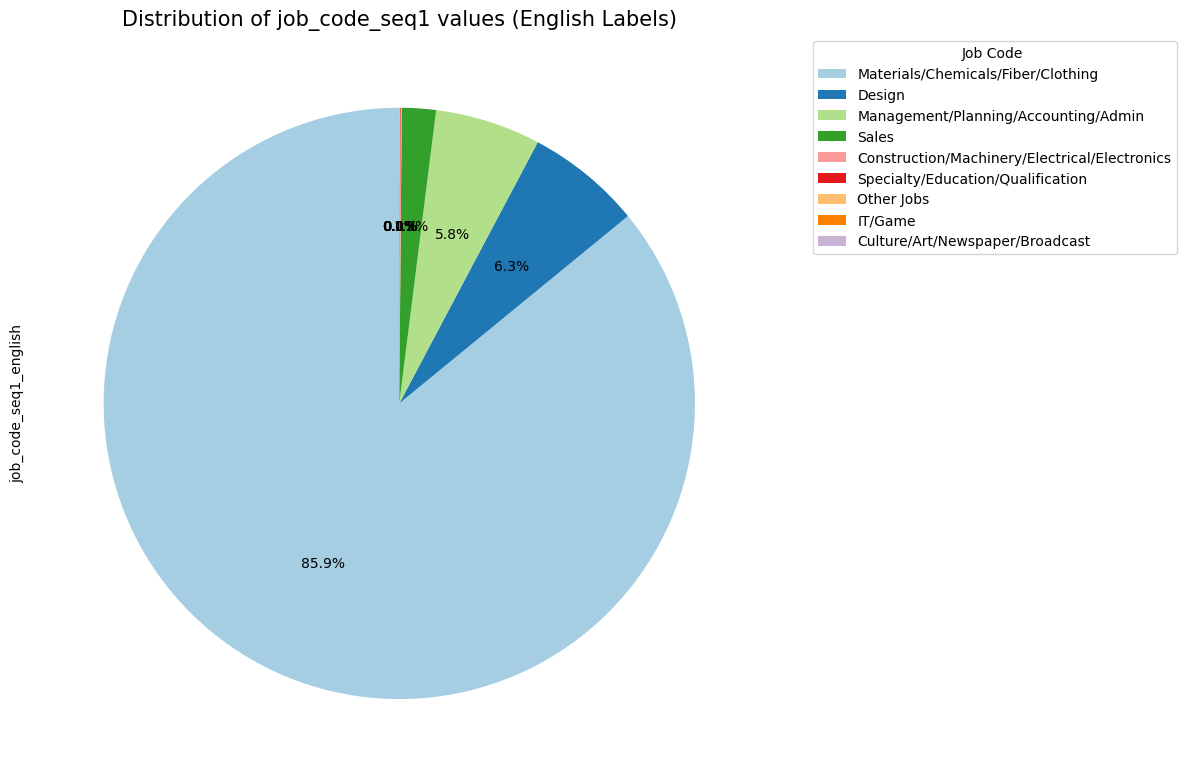

In [ ]:
# 파이 차트 그리기
plt.figure(figsize=(12, 12))
pie = job_code_seq1_english_counts.plot(
    kind='pie',
    autopct='%1.1f%%',
    startangle=90,
    colors=plt.cm.Paired.colors,
    labels=None  # 라벨 숨김
)

# 범례 설정
plt.legend(job_code_seq1_english_counts.index, title='Job Code ', bbox_to_anchor=(1.05, 1), loc='upper left')

# 제목 설정
plt.title('Distribution of job_code_seq1 values (English Labels)', fontsize=15)

# 그래프 출력
plt.tight_layout()
plt.show()



## > **job_code_seq2**

개수가 적어서 의미없음



In [ ]:
# job_code_seq2 컬럼의 값별 빈도수 확인
job_code_seq2_counts = resume_data['job_code_seq2'].value_counts()
job_code_seq2_counts

영업·판매·TM       261
재료·화학·섬유·의복    132
디자인             54
전문·교육·자격        16
건설·기계·전기·전자      9
IT·게임            8
문화·예술·신문·방송      8
경영·기획·회계·사무      7
기술·과학·산업         3
여행사              1
기타 직종            1
Name: job_code_seq2, dtype: int64



## > **job_code_seq3**

개수가 적어서 의미 없음


In [ ]:
# job_code_seq3 컬럼의 값별 빈도수 확인
job_code_seq3_counts = resume_data['job_code_seq3'].value_counts()
job_code_seq3_counts

영업·판매·TM       73
전문·교육·자격       38
디자인            38
IT·게임          10
기타 직종          10
재료·화학·섬유·의복     6
기술·과학·산업        4
문화·예술·신문·방송     4
건설·기계·전기·전자     2
통신·모바일          1
관광              1
Name: job_code_seq3, dtype: int64



## > **career_month**

12개월(1년)을 범위로 하여 career_month 컬럼의 값을 분석

다음과 같은 범위로 데이터를 분류

0-12개월
13-24개월
25-36개월
37-48개월
49-60개월
61개월 이상

- 신입이거나 6년이상 일했거나 경우가 반 이상이다


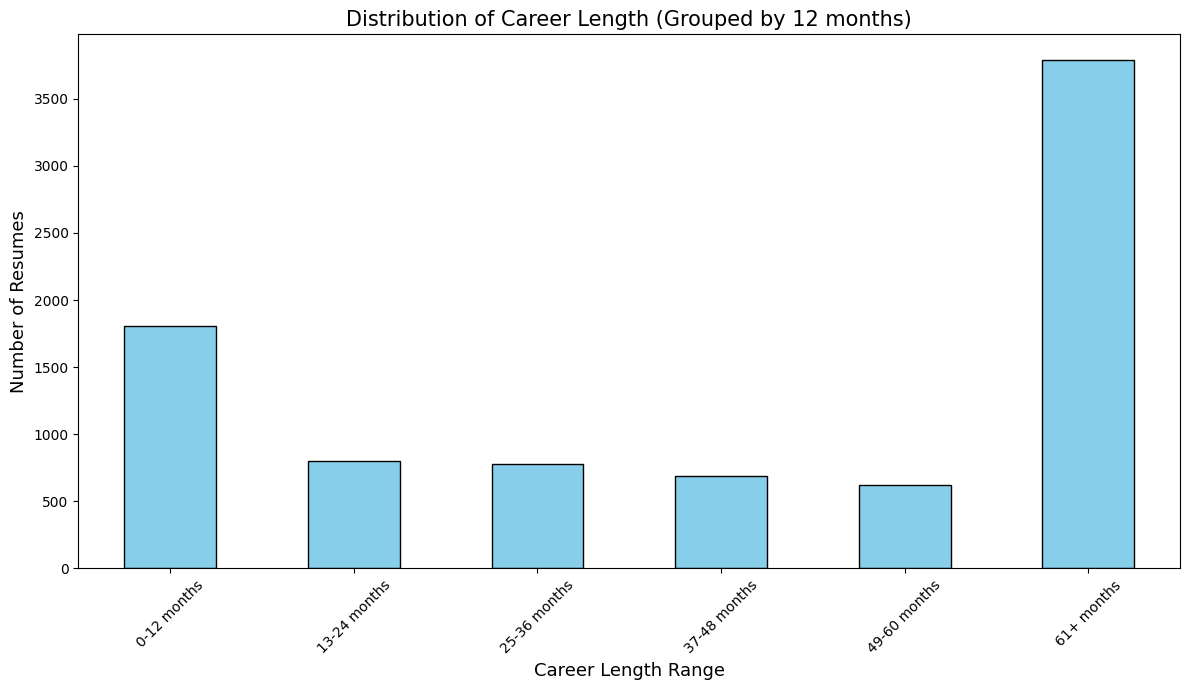

In [ ]:
# 12개월을 범위로 career_month 컬럼의 값을 분류
bins = [-1, 12, 24, 36, 48, 60, resume_data['career_month'].max()]
labels = ['0-12 months', '13-24 months', '25-36 months', '37-48 months', '49-60 months', '61+ months']

# pd.cut을 사용하여 범위별로 분류
resume_data['career_month_range'] = pd.cut(resume_data['career_month'], bins=bins, labels=labels)

# 각 범위별 빈도수 확인
career_month_range_counts = resume_data['career_month_range'].value_counts().sort_index()

# 바 그래프로 시각화
plt.figure(figsize=(12, 7))
career_month_range_counts.plot(kind='bar', color='skyblue', edgecolor='black')

# 그래프 설정
plt.title('Distribution of Career Length (Grouped by 12 months)', fontsize=15)
plt.xlabel('Career Length Range', fontsize=13)
plt.ylabel('Number of Resumes', fontsize=13)
plt.xticks(rotation=45)

# 그래프 출력
plt.tight_layout()
plt.show()




## > **career_job_code**



In [ ]:
# career_job_code 컬럼의 값별 빈도수 확인
career_job_code_counts = resume_data['career_job_code'].value_counts()
career_job_code_counts

섬유;봉제;가방;의류            5059
도소매;유통;무역               821
디자인;CAD;설계              653
쇼핑몰;전자상거래;경매            133
기타 서비스                  119
학교;학원;직원훈련(교육서비스)        99
기타 제조                    81
광고;홍보                    81
영화;방송;공연;문화;스포츠          79
생활용품;화장품;완구              53
건설;토목;건축                 52
식음료;식품가공                 49
금융;보험;증권                 43
호텔;숙박;관광;여행;외식           35
전기;전자;통신장비               35
출판;인쇄;편집;영상              30
신문;서적;출판;인쇄              28
자동차;운송장비;조선;항공           27
공공행정;경찰;기관;협회            26
의료;제약;건강                 22
인터넷서비스;포털;컨텐츠            20
컴퓨터;사무기기;소비재             19
운송;운수;통신                 15
철강;금속;비금속;재료             15
반도체;LCD;광학;정밀            13
화학;고무;플라스틱               13
목재;나무;종이;가구              11
네트워크;통신;텔레콤              11
기타 공공;개인서비스              10
병원;제약;사회복지               10
기계;각종 장비                  9
웹에이전시                     9
인력공급;시설유지;TM(용역;도급)       8
IT 컨설팅;조사분석;통계            8
게임;캐릭터;애니메이션              7
전기;가스;수도;에너지        